In [30]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Decision Trees

## 1. Explore

In [31]:
gpa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/CCfraud.csv")

#(ggplot(gpa, aes()) + geom_bar())

## 2. Build Model

In [32]:
X = gpa[["home","amount","cashBack"]]
y = gpa["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
zscore = StandardScaler()
zscore.fit(X_train[["amount"]])

X_train["amount"] = zscore.transform(X_train[["amount"]])
X_test["amount"] = zscore.transform(X_test[["amount"]])

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 3. Evaluate Model

In [33]:
y_pred = tree.predict(X_test)

accuracy_score(y_pred, y_test)

0.9

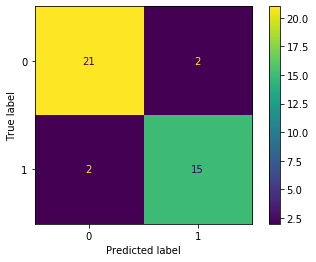

In [34]:
plot_confusion_matrix(tree,X_test,y_test)

## Looking more into our tree and playing around

In [39]:
tree.get_depth()

10

In [40]:
tree.get_n_leaves()

36

In [41]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
y_pred = tree.predict(X_test)

accuracy_score(y_pred, y_test)

0.9

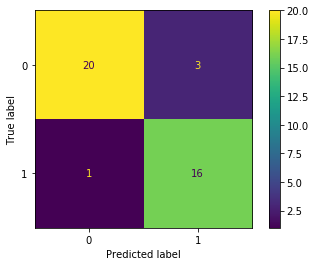

In [43]:
plot_confusion_matrix(tree,X_test,y_test)

In [44]:
tree.get_depth()

5

In [45]:
tree.feature_importances_

array([0.11531772, 0.82539578, 0.0592865 ])

1.0